In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/games.csv")

print("Total de jogos:", len(df))

df.head()

Total de jogos: 1376


,home,away,date,odd_home,odd_tie,odd_away,championship,winner
0,Newcastle,Wolverhampton,2022-04-08,2.25,3.20,3.40,Premier League,home
1,Everton,Man Utd,2022-04-09,4.50,3.75,1.75,Premier League,home
2,Arsenal,Brighton,2022-04-09,1.61,3.80,5.75,Premier League,away
3,Southampton,Chelsea,2022-04-09,4.00,3.75,1.90,Premier League,away
4,Watford,Leeds,2022-04-09,2.70,3.40,2.55,Premier League,away


In [10]:
df = df[~df["winner"].isnull()]

In [11]:
df.loc[df["odd_home"] < df["odd_away"], "lower"] = "home"
df.loc[df["odd_home"] < df["odd_away"], "lower_odd"] = df["odd_home"]

df.loc[df["odd_away"] < df["odd_home"], "lower"] = "away"
df.loc[df["odd_away"] < df["odd_home"], "lower_odd"] = df["odd_away"]

df.head()

,home,away,date,odd_home,odd_tie,odd_away,championship,winner,lower,lower_odd
0,Newcastle,Wolverhampton,2022-04-08,2.25,3.20,3.40,Premier League,home,home,2.25
1,Everton,Man Utd,2022-04-09,4.50,3.75,1.75,Premier League,home,away,1.75
2,Arsenal,Brighton,2022-04-09,1.61,3.80,5.75,Premier League,away,home,1.61
3,Southampton,Chelsea,2022-04-09,4.00,3.75,1.90,Premier League,away,away,1.90
4,Watford,Leeds,2022-04-09,2.70,3.40,2.55,Premier League,away,away,2.55


In [12]:
print("Quantidade de jogos:", len(df))
print("Proporção de empates:", len(df[df["winner"] == "tie"])/len(df))
print("Proporção de vitórias casa:", len(df[df["winner"] == "home"])/len(df))
print("Proporção de vitórias visitante:", len(df[df["winner"] == "away"])/len(df))

Quantidade de jogos: 1055
Proporção de empates: 0.2663507109004739
Proporção de vitórias casa: 0.43601895734597157
Proporção de vitórias visitante: 0.2976303317535545


In [5]:
df = df[df["lower_odd"] <= 1.7]

In [13]:
df.loc[df["winner"] == df["lower"], "profit"] = (5 * df["lower_odd"]) - 5
df.loc[df["winner"] != df["lower"], "profit"] = -5

print(len(df[df["winner"] == df["lower"]])/len(df))

df.head()

0.5184834123222749


,home,away,date,odd_home,odd_tie,odd_away,championship,winner,lower,lower_odd,profit
0,Newcastle,Wolverhampton,2022-04-08,2.25,3.20,3.40,Premier League,home,home,2.25,6.25
1,Everton,Man Utd,2022-04-09,4.50,3.75,1.75,Premier League,home,away,1.75,-5.00
2,Arsenal,Brighton,2022-04-09,1.61,3.80,5.75,Premier League,away,home,1.61,-5.00
3,Southampton,Chelsea,2022-04-09,4.00,3.75,1.90,Premier League,away,away,1.90,4.50
4,Watford,Leeds,2022-04-09,2.70,3.40,2.55,Premier League,away,away,2.55,7.75


In [14]:
len(df)

1055

In [15]:
df["profit"].sum()

-280.77

In [11]:
df[["championship", "profit"]].groupby("championship").sum()

,profit
championship,
1 Divisão A (Bélgica),2.650
1HNL (Croatia),-7.100
A-league (Austrália),-0.350
Allsvenskan (Suécia),9.900
Apertura (Bolivia),-4.250
Brasileirao,-39.450
Bundesliga,-6.900
Bundesliga (Austria),-7.300
Campeonato Nacional (Equador),-0.200


In [76]:
df[["championship", "winner"]].groupby("championship").value_counts()

championship               winner
1 Divisão A (Bélgica)      tie       2
                           home      2
1HNL (Croatia)             home      5
                           tie       4
                           away      2
                                    ..
Superligaen (Dinamarca)    away      6
                           home      4
                           tie       2
Veikkausliiga (Finlândia)  home      8
                           away      4
Length: 117, dtype: int64

In [77]:
df[["date", "profit"]].groupby("date").sum()

,profit
date,
2022-04-08,19.100
2022-04-09,19.800
2022-04-10,-0.950
2022-04-11,-4.500
2022-04-12,14.400
2022-04-13,-4.250
2022-04-14,-13.150
2022-04-15,-6.850
2022-04-16,5.100


In [78]:
print("Minimum value:", df["lower_odd"].min())
print("Maximum value:", df["lower_odd"].max())

Minimum value: 1.083
Maximum value: 2.87


In [79]:
profits = []
for odd in np.arange(1, 2.6, step=0.1):
    aux_min = df[df["lower_odd"] > odd]
    aux_max = df[df["lower_odd"] < odd]
    profits.append({
        "odd": odd,
        "profit_min": aux_min["profit"].sum(),
        "profit_max": aux_max["profit"].sum(),
    })
profits = pd.DataFrame(profits)
profits.head()

,odd,profit_min,profit_max
0,1.0,-77.835,0.000
1,1.1,-78.700,0.865
2,1.2,-81.700,3.865
3,1.3,-48.700,-29.135
4,1.4,-67.000,-10.835


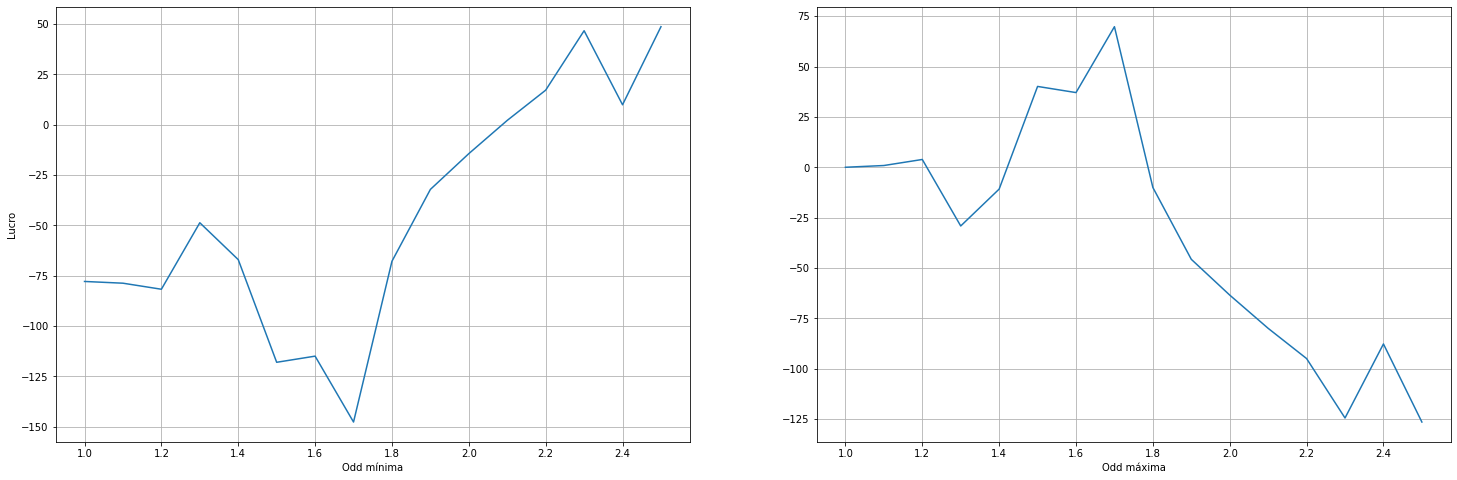

In [80]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.plot(profits["odd"], profits["profit_min"])
plt.xlabel("Odd mínima")
plt.ylabel("Lucro")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(profits["odd"], profits["profit_max"])
plt.xlabel("Odd máxima")
plt.grid()
plt.show()

In [81]:
profits[profits["profit_min"] == profits["profit_min"].max()]

,odd,profit_min,profit_max
15,2.5,48.6,-126.435


In [82]:
df = df[df["lower_odd"] < 2.4]
df[["championship", "profit"]].groupby("championship").sum()

,profit
championship,
1 Divisão A (Bélgica),-0.850
1HNL (Croatia),-8.300
A-league (Austrália),8.500
Allsvenskan (Suécia),1.100
Apertura (Bolivia),-9.450
Apertura (Uruguai),7.350
Brasileirao,0.550
Bundesliga,-26.900
Bundesliga (Austria),-8.950


In [83]:
df["profit"].sum()

-96.68499999999997